# LFC Data Analysis: From Rafa to Rogers
#### Lies, Damn Lies and Statistics

See Terry's blog [LFC: From Rafa To Rogers](http://terrydolan.blogspot.com/2015/05/lfc-from-rafa-to-rogers-there-are-three.html) for a discussion of of the data generated by this analysis.

This notebook analyses Liverpool FC's premier league performance from Rafael Benitez to Brendan Rogers, a period of 11 years covering season 2004-5 to 2014-15. The analysis uses [IPython Notebook](http://ipython.org/notebook.html), [python](https://www.python.org/), [pandas](http://pandas.pydata.org/) and [matplotlib](http://matplotlib.org/) to analyse the data sets. 

Last updated: 25th May 2015.

# Set-up

Let's import the modules needed for the analysis.

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sys 
from datetime import datetime
from __future__ import division

# enable inline plotting
%matplotlib inline

Print version numbers.

In [2]:
print 'python version: {}'.format(sys.version)
print 'pandas version: {}'.format(pd.__version__)
print 'matplotlib version: {}'.format(mpl.__version__)
print 'numpy version: {}'.format(np.__version__)

python version: 2.7.8 |Anaconda 2.2.0 (64-bit)| (default, Jul  2 2014, 15:12:11) [MSC v.1500 64 bit (AMD64)]
pandas version: 0.15.2
matplotlib version: 1.4.3
numpy version: 1.9.2


# Data Load

#### Data description

The data files are located in the *data* sub-directory.

Match data

The E0_&lt;season&gt;.csv files were downloaded from [english premiership stats](http://www.football-data.co.uk/englandm.php). These files contain the premier league match data from season 2004-5 to season 2014-15. The csv structure is described in the [notes](http://www.football-data.co.uk/notes.txt).

LFC top scorers data

The LFC_PL_scorers_2004-05_2014-15.csv file was constructed from data held at the excellent [lfchistory.net](http://www.lfchistory.net/). This file contains the LFC top scorers in the premier league from 2004-5 to 2014-15.

LFC top scorers appearance data

The LFC_PL_top_apps.csv file was also constructed from data held at [lfchistory.net](http://www.lfchistory.net/). This file contains the premier league appearances of the LFC top 5 scorers from 2004-5 to 2014-15. 

Rich list data

The Rich_list_2015.csv file was extracted from [Forbes' list of the most valuable football clubs on wikipedia](http://en.wikipedia.org/wiki/Forbes%27_list_of_the_most_valuable_football_clubs). This file contains the list of the 10 richest clubs in the world, as ranked by Forbes magazine.

LFC champion hotshots

The LFC_champ_hotshots.csv file was also constructed from data held at [lfchistory.net](http://www.lfchistory.net/). This file contains the LFC top scoring partnerships for the 18 title winning seasons.

####Read the match data into a pandas dataframe for each season. 

In [3]:
# define list of seasons to analyse, corresponding to the csv files
SEASON_LIST = ['2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', 
               '2010-11', '2011-12', '2012-13', '2013-14', '2014-15'] 
MOST_RECENT_SEASON = SEASON_LIST[-1]

# defines the selected columns from the csv file to keep 
COLUMNS_FILTER = ['Date', 'HomeTeam','AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HS', 
                  'AS', 'HST', 'AST']

# define dictionary to hold premier league dataframes
# key is the season and value is the dataframe
df_dict = {} 

# read the selected data in each csv into the dictionary
for season in SEASON_LIST:
    df_dict[season] = pd.read_csv('data/E0_{}.csv'.format(season), usecols=COLUMNS_FILTER)

Check the number of rows and columns for each season's dataframe.

In [4]:
for season, df in sorted(df_dict.items()):
    print 'season={}, shape={}'.format(season, df.shape)

season=2004-05, shape=(380, 10)
season=2005-06, shape=(380, 10)
season=2006-07, shape=(380, 10)
season=2007-08, shape=(380, 10)
season=2008-09, shape=(380, 10)
season=2009-10, shape=(380, 10)
season=2010-11, shape=(380, 10)
season=2011-12, shape=(380, 10)
season=2012-13, shape=(380, 10)
season=2013-14, shape=(380, 10)
season=2014-15, shape=(380, 10)


11 seasons, each with 380 games per season - as expected.

Let's check the data - display the final 5 matches from the most recent season.

In [5]:
print 'season: {}'.format(MOST_RECENT_SEASON)
df_dict[MOST_RECENT_SEASON].tail()

season: 2014-15


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST
375,24/05/15,Hull,Man United,0,0,D,16,7,6,1
376,24/05/15,Leicester,QPR,5,1,H,22,18,7,2
377,24/05/15,Man City,Southampton,2,0,H,15,13,6,4
378,24/05/15,Newcastle,West Ham,2,0,H,17,4,4,1
379,24/05/15,Stoke,Liverpool,6,1,H,15,13,9,4


Stoke 6 (SIX!), what a debacle.

####Read the LFC scorers data into a dataframe.

In [6]:
dflfc_scorers = pd.read_csv('data/LFC_PL_scorers_2004-05_2014-15.csv')

Let's check the data - show the top 3 scorers for the most recent season. 

In [7]:
print dflfc_scorers[dflfc_scorers['Season'] == MOST_RECENT_SEASON].head(3)

      Season            Player  LeagueGoals
143  2014-15    Steven Gerrard            9
144  2014-15   Raheem Sterling            7
145  2014-15  Jordan Henderson            6


####Read the LFC top scorer appearances data into a dataframe.

In [8]:
dflfc_apps = pd.read_csv('data/LFC_PL_top_apps.csv')

Let's check the data - show Suarez' appearances.

In [9]:
dflfc_apps[dflfc_apps['Player'] == 'Luis Suarez']

,Seasons,Player,Appearances
13,2010-2011,Luis Suarez,13
14,2011-2012,Luis Suarez,31
15,2012-2013,Luis Suarez,33
16,2013-2014,Luis Suarez,33


####Read the Forbes rich list into a dataframe.
Note that the data is restricted to the top 10 in 2015.

In [10]:
rich_list_2015 = pd.read_csv('data/Rich_list_2015.csv')

Let's check the data - show the top 3.

In [11]:
rich_list_2015.head(3)

,Rank,Team,Country,Value($M),Revenue($M)
0,1,Real Madrid,Spain,3260,746
1,2,FC Barcelona,Spain,3160,657
2,3,Man United,England,3100,703


####Read the LFC title winning scoring partnerships into a dataframe.

In [12]:
dflfc_champ_hotshots = pd.read_csv('data/LFC_champ_hotshots.csv')

Let's show the hotshots from season 1900-01, Liverpool's first title winning season.

In [13]:
dflfc_champ_hotshots[dflfc_champ_hotshots['Season'] == '1900-01']

,Season,Player,LeagueGoals,Manager
0,1900-01,Sam Raybould,17,Tom Watson
1,1900-01,Jack Cox,10,Tom Watson


# Data Munge

Let's munge the dataframes to provide a reworked view for the LFC match results only.

In [14]:
def assign_points(row):
    """Return the points associated with given win, draw or loss result."""
    
    POINTS_MAPPER = {'W': 3, 'D': 1, 'L': 0}
    return POINTS_MAPPER[row['R']]

In [15]:
def prem_munge(df, team='Liverpool'):
    """Return new dataframe for given team.
    
        input dataframe columns: see http://www.football-data.co.uk/englandm.php
        with 
        
        output dataframe columns:
        'Date', 'Opponent', 'R', 'HA', GF', 'GA', SF', 'SA', 'SFT', 'SAT', 'PTS', 'CUMPTS'
        
        Date is match Date (datetime), Opponent is opponent (str)
        HA is Home or Away (str: 'H' or 'A')
        R is Result (str: 'W' or 'D' or 'L')
        GF is Goals For (int), GA is Goals Against (int)
        SF is Shots For (int), SA is Shots Against (int)
        SFT is Shots For on Target (int), SAT is Shots Against on Target (int)       
        PTS is PoinTS (int), CUMPTS is CUMlative PoinTS (int)
    """
 
    DATE_FORMAT = '%d/%m/%y' # input dataframe's Date column format
    ALT_DATE_FORMAT = '%d/%m/%Y' # used for 2004-5 dataframe
    
    # define column order for the output dataframe
    COLUMN_ORDER = ['Date', 'Opponent', 'HA', 'R', 'GF', 'GA', 
                    'SF', 'SA', 'SFT', 'SAT', 'PTS', 'CUMPTS']

    # filter dataframe for home team 
    df_home = df[(df['HomeTeam'] == team)].copy()
    df_home['HA'] = 'Home'
    df_home.drop('HomeTeam', inplace=True, axis=1)
    
    ########################
    # rebuild home dataframe 
    df_home.rename(columns={'AwayTeam': 'Opponent', 'FTHG': 'GF', 'FTAG': 'GA', 'FTR': 'R',
                            'HS': 'SF', 'AS': 'SA', 'HST': 'SFT', 'AST': 'SAT'}, inplace=True)

    # rework home result and assign points
    
    # define mapping dictionary, Home win is win for home team, Away win is loss
    HOME_MAPPER = {'H': 'W', 'D': 'D', 'A': 'L'} 
    f_home = lambda x: HOME_MAPPER[x]
    df_home['R'] = df_home['R'].map(f_home)
    df_home['PTS'] = df_home.apply(assign_points, axis=1) 

    # filter dataframe for away team 
    df_away = df[(df['AwayTeam'] == team)].copy()
    df_away['HA'] = 'Away'
 
    ########################
    # rebuild away dataframe 
    df_away.rename(columns={'HomeTeam': 'Opponent', 'FTHG': 'GA', 'FTAG': 'GF', 'FTR': 'R',
                           'HS': 'SA', 'AS': 'SF', 'HST': 'SAT', 'AST': 'SFT'}, inplace=True)

    # rework away result and assign points
    
    # define mapping dictionary, Away win is win for away team, Home win is loss
    AWAY_MAPPER = {'H': 'L', 'D': 'D', 'A': 'W'} 
    f_away = lambda x: AWAY_MAPPER[x]
    df_away['R'] = df_away['R'].map(f_away)
    df_away['PTS'] = df_away.apply(assign_points, axis=1)   
    df_away.drop('AwayTeam', inplace=True, axis=1)
    
    
    ########################
    # create new dataframe by combining home and away dataframes
    df_new = pd.concat([df_home, df_away])    

    # convert Date column to datetime (uses numpy datetime64) and sort by date
    try:
        df_new['Date'] = pd.to_datetime(df_new['Date'], format=DATE_FORMAT)
    except ValueError:
        df_new['Date'] = pd.to_datetime(df_new['Date'], format=ALT_DATE_FORMAT)            
    df_new.sort(columns='Date', inplace=True)
    
    # add new CUMPTS column of cumulative points
    df_new['CUMPTS'] = df_new['PTS'].cumsum()
    
    # reset index to give match number, starting at 0
    df_new.reset_index(inplace=True, drop=True)
    
    # re-work columns to match required column order
    df_new = df_new[COLUMN_ORDER] 

    return df_new

Test the munge with the most recent LFC season - display the first 5 matches

In [16]:
df = prem_munge(df_dict[MOST_RECENT_SEASON])
df.head()

,Date,Opponent,HA,R,GF,GA,SF,SA,SFT,SAT,PTS,CUMPTS
0,2014-08-17,Southampton,Home,W,2,1,12,12,5,6,3,3
1,2014-08-25,Man City,Away,L,1,3,11,9,3,4,0,3
2,2014-08-31,Tottenham,Away,W,3,0,17,7,8,1,3,6
3,2014-09-13,Aston Villa,Home,L,0,1,18,5,1,1,0,6
4,2014-09-20,West Ham,Away,L,1,3,11,13,5,7,0,6


Create dictionary to hold the new LFC dataframes, with key of season and value of dataframe.

In [17]:
dflfc_dict = {}
for season, df in sorted(df_dict.items()):
    dflfc_dict[season] = prem_munge(df)

Let's display the last 5 rows of munged dataframe for the most recent season.

In [18]:
dflfc_dict[MOST_RECENT_SEASON].tail()

,Date,Opponent,HA,R,GF,GA,SF,SA,SFT,SAT,PTS,CUMPTS
33,2015-04-28,Hull,Away,L,0,1,12,7,9,4,0,58
34,2015-05-02,QPR,Home,W,2,1,25,10,8,2,3,61
35,2015-05-10,Chelsea,Away,D,1,1,15,8,4,3,1,62
36,2015-05-16,Crystal Palace,Home,L,1,3,18,15,3,6,0,62
37,2015-05-24,Stoke,Away,L,1,6,13,15,4,9,0,62


Check the number of rows and columns.

In [19]:
for season, df in sorted(dflfc_dict.items()):
    print 'season={}, shape={}'.format(season, df.shape)

season=2004-05, shape=(38, 12)
season=2005-06, shape=(38, 12)
season=2006-07, shape=(38, 12)
season=2007-08, shape=(38, 12)
season=2008-09, shape=(38, 12)
season=2009-10, shape=(38, 12)
season=2010-11, shape=(38, 12)
season=2011-12, shape=(38, 12)
season=2012-13, shape=(38, 12)
season=2013-14, shape=(38, 12)
season=2014-15, shape=(38, 12)


As expected each season's dataframe contains 38 matches.

In [20]:
print 'total LFC matches analysed: {}'.format(sum(dflfc_dict[season].shape[0] for season in SEASON_LIST))

total LFC matches analysed: 418


# Data Analysis

Let's now analyse the data... Think of a question and produce the answer!

## Compare key stats (totals)

In [21]:
dflfc_seasons = pd.DataFrame()
for season, dflfc in sorted(dflfc_dict.items()):
    dflfc_summary = pd.DataFrame(dflfc.sum()).transpose()
    dflfc_summary.drop('CUMPTS', axis=1, inplace=True)
    dflfc_summary['Season'] = season
    dflfc_summary['GD'] = (dflfc_summary['GF'] - dflfc_summary['GA']) # goal difference
    dflfc_summary['SPG'] = (dflfc_summary['SF']/dflfc_summary['GF']).round(2) # shots per goal
    dflfc_seasons = pd.concat([dflfc_seasons, dflfc_summary], axis=0)
dflfc_seasons.set_index('Season', inplace=True)
dflfc_seasons.columns.name = 'Total'
dflfc_seasons

Total,GF,GA,SF,SA,SFT,SAT,PTS,GD,SPG
Season,,,,,,,,,
2004-05,52,41,490,285,241,156,58,11,9.42
2005-06,57,25,563,245,283,126,82,32,9.88
2006-07,57,27,592,265,286,133,68,30,10.39
2007-08,67,28,607,278,320,133,76,39,9.06
2008-09,77,27,609,266,311,142,86,50,7.91
2009-10,61,35,519,328,288,180,63,26,8.51
2010-11,59,44,475,409,268,209,58,15,8.05
2011-12,47,40,612,376,330,199,52,7,13.02
2012-13,71,43,669,383,385,217,61,28,9.42


Let's look at goal difference.

In [22]:
dflfc_seasons.sort(['GD'], ascending=False)

Total,GF,GA,SF,SA,SFT,SAT,PTS,GD,SPG
Season,,,,,,,,,
2013-14,101,50,650,475,259,150,84,51,6.44
2008-09,77,27,609,266,311,142,86,50,7.91
2007-08,67,28,607,278,320,133,76,39,9.06
2005-06,57,25,563,245,283,126,82,32,9.88
2006-07,57,27,592,265,286,133,68,30,10.39
2012-13,71,43,669,383,385,217,61,28,9.42
2009-10,61,35,519,328,288,180,63,26,8.51
2010-11,59,44,475,409,268,209,58,15,8.05
2004-05,52,41,490,285,241,156,58,11,9.42


Plot points per season

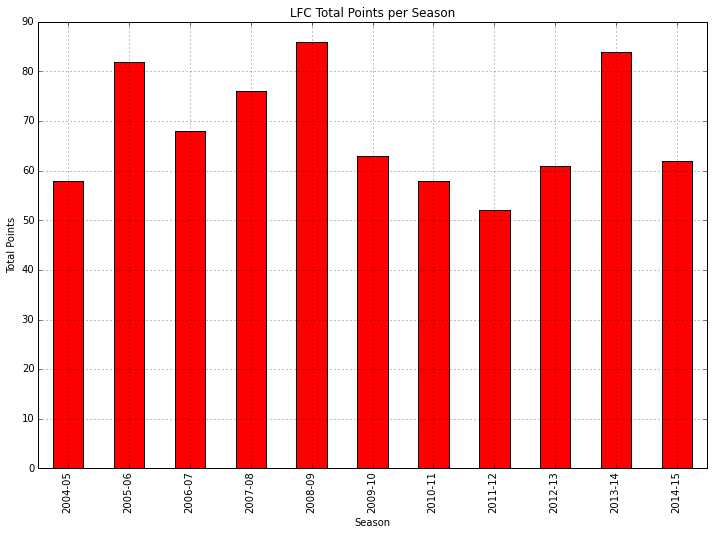

In [23]:
FIG_SIZE = (12, 8)
fig = plt.figure(figsize=FIG_SIZE)
ax = dflfc_seasons['PTS'].plot(kind='bar', title='LFC Total Points per Season', color='red')
ax.set_ylabel("Total Points")
plt.show()

Plot goals per season

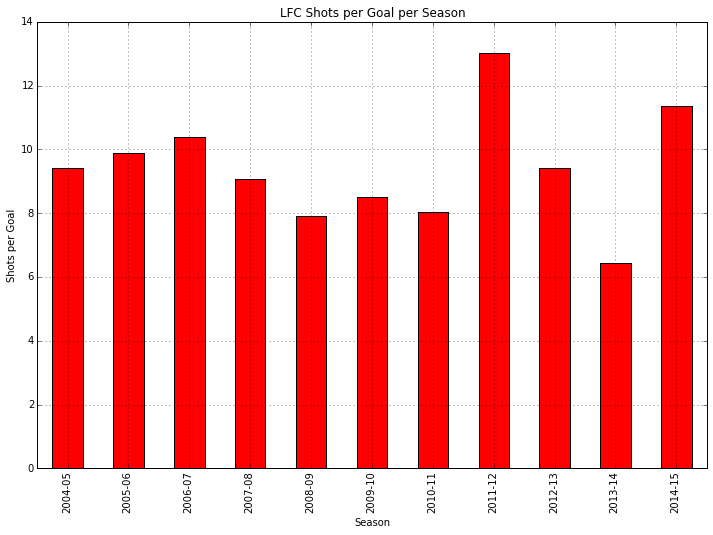

In [24]:
FIG_SIZE = (12, 8)
fig = plt.figure(figsize=FIG_SIZE)
ax = dflfc_seasons['SPG'].plot(kind='bar', title='LFC Shots per Goal per Season', color='red')
ax.set_ylabel("Shots per Goal")
plt.show()

Plot goal difference

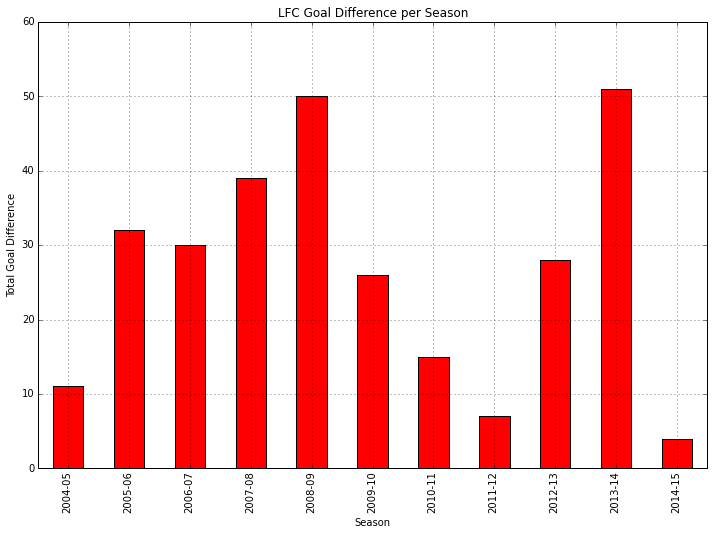

In [25]:
FIG_SIZE = (12, 8)
fig = plt.figure(figsize=FIG_SIZE)
ax = (dflfc_seasons['GF'] - dflfc_seasons['GA']).plot(kind='bar', title='LFC Goal Difference per Season', color='red')
ax.set_ylabel("Total Goal Difference")
plt.show()

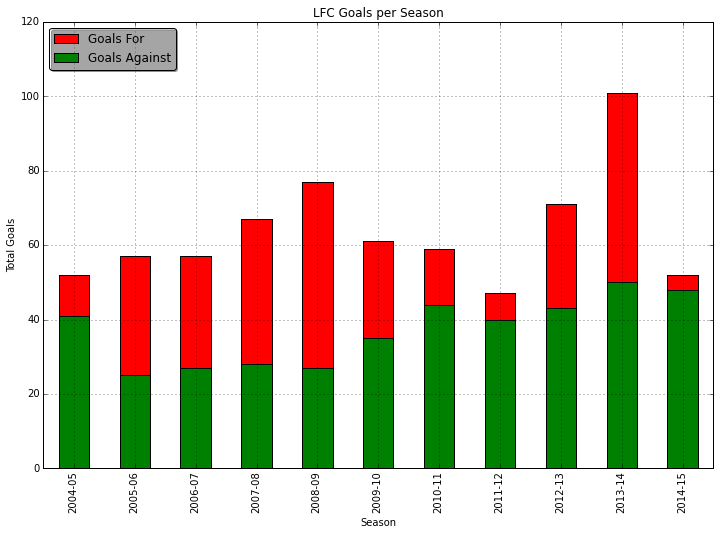

In [26]:
FIG_SIZE = (12, 8)
fig = plt.figure(figsize=FIG_SIZE)
ax = dflfc_seasons['GF'].plot(kind='bar', label='Goals For', title='LFC Goals per Season', color='red')
ax = dflfc_seasons['GA'].plot(kind='bar', stacked=True, color='green', label='Goals Against')
ax.set_ylabel("Total Goals")
ax.legend(loc='upper left', fancybox=True, shadow=True)
plt.show()

Rafa achieved the best defensive performance, in particular from 2005-06 to 2008-09. Let's find the average goals conceded across these 4 season.

In [27]:
dflfc_seasons['GA']

Season
2004-05    41
2005-06    25
2006-07    27
2007-08    28
2008-09    27
2009-10    35
2010-11    44
2011-12    40
2012-13    43
2013-14    50
2014-15    48
Name: GA, dtype: int64

In [28]:
RAFA_BEST_GA = ['2005-06', '2006-07', '2007-08', '2008-09']
dflfc_seasons['GA'].loc[RAFA_BEST_GA].mean().round(1)

26.800000000000001

what is best goal difference?

In [29]:
s = dflfc_seasons['GD'].copy()
s.sort('GD', ascending=False)
s

Season
2013-14    51
2008-09    50
2007-08    39
2005-06    32
2006-07    30
2012-13    28
2009-10    26
2010-11    15
2004-05    11
2011-12     7
2014-15     4
Name: GD, dtype: int64

Let's add the LFC top goal scorers to this LFC Goals per Season chart.

In [30]:
def lfc_top_scorers(df, season, n):
    """Return list of names of top n goal scorers for given season in given dataframe.
    
       Exclude own goals.
       If there are multiple scorers on same number of goals then return them all.
       
        Input:
           df - pandas dataframe containing cols: 'Season', 'Player', 'LeagueGoals'
           season - str containing season e.g. '2014-15'
           n - integer containing number of top goal scorers to return
        Output
           top_scorer_list - list of (player, goals) tuples 
    """

    target = n # target number of scorers
    top_scorer_list = [] # holds top player list, containing (player, goals)
    count = 0
    prev_tot = None
    for player, goal_tot in df[['Player', 'LeagueGoals']][(df['Season'] == season) &
                                                         (df['Player'] != 'Own goals')].values:
        if goal_tot != prev_tot: 
            # goal tot not same as before so increment count
            count += 1
            prev_tot = goal_tot
                
        if count > target:
            break
        else:
            top_scorer_list.append((player, goal_tot))

    return top_scorer_list

In [31]:
# test
L = lfc_top_scorers(dflfc_scorers, '2006-07', 3)
print L

[('Dirk Kuyt', 12L), ('Peter Crouch', 9L), ('Craig Bellamy', 7L), ('Steven Gerrard', 7L)]


In [32]:
# test join
L2 = '\n'.join(['{} ({})'.format(player, goals) for player, goals in L])
print L2
print len(L)

Dirk Kuyt (12)
Peter Crouch (9)
Craig Bellamy (7)
Steven Gerrard (7)
4


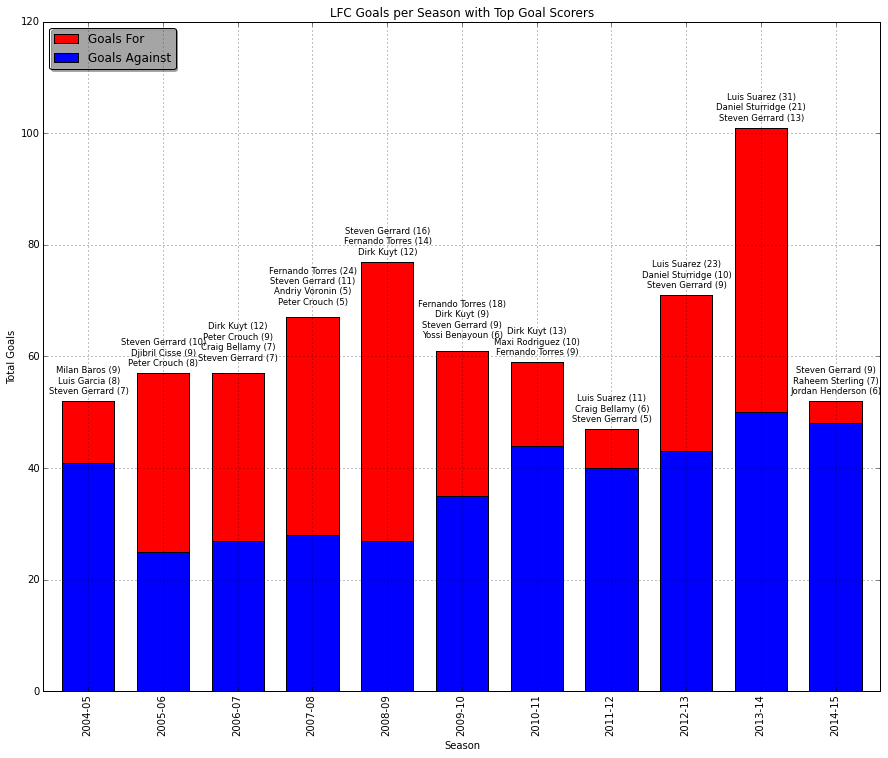

In [33]:
NUM_TOP_SCORERS = 3
FIG_SIZE = (15, 12)
WIDTH = 0.7

fig = plt.figure(figsize=FIG_SIZE)
ax = dflfc_seasons['GF'].plot(kind='bar', label='Goals For', color='red', width=WIDTH)
ax = dflfc_seasons['GA'].plot(kind='bar', label='Goals Against', color='blue', width=WIDTH, stacked=True)

for season, gf in dflfc_seasons['GF'].iteritems():    
    # determine top goal scorers and form string to print
    top_scorer_list = lfc_top_scorers(dflfc_scorers, season, NUM_TOP_SCORERS)
    top_scorer_str = '\n'.join(['{} ({})'.format(player, goals) for player, goals in top_scorer_list])
    
    # calculate position of annotation
    sidx = SEASON_LIST.index(season)
    x, y = (sidx, gf + len(top_scorer_list) - 2)

    # annotate above GF bar the names of top scorers and number of goals
    ax.annotate(top_scorer_str, xy=(x,y), xytext=(x,y), va="bottom", ha="center", fontsize=8.5)
    
ax.set_ylabel("Total Goals")
ax.set_title('LFC Goals per Season with Top Goal Scorers')
ax.legend(loc='upper left', fancybox=True, shadow=True)
plt.show()
fig.savefig('SeasonvsGoals.png', bbox_inches='tight')

## Let's find the top scorers across all seasons

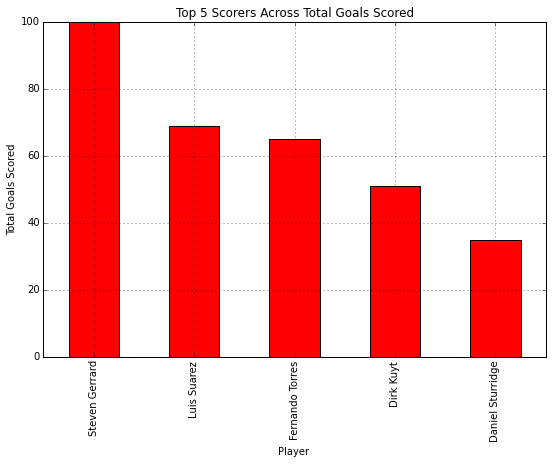

In [34]:
TITLE = 'Top 5 Scorers Across Total Goals Scored'
FIG_SIZE = (9, 6)
fig = plt.figure(figsize=FIG_SIZE)

dflfc_scorers_grouped = pd.DataFrame(dflfc_scorers['LeagueGoals'].groupby(dflfc_scorers['Player']).sum())
dflfc_topscorers = dflfc_scorers_grouped.sort('LeagueGoals', ascending=False).head(5)

ax = dflfc_topscorers.plot(kind='bar', legend='False', color='red', figsize=FIG_SIZE)
ax.set_ylabel('Total Goals Scored')
ax.set_title(TITLE)
ax.legend_.remove()
fig = plt.gcf() # save current figure
plt.show()
#fig.savefig('PlayervsGoals.png', bbox_inches='tight')

Let's add the appearance data for top 5 players.

In [35]:
dflfc_apps.head()

,Seasons,Player,Appearances
0,2012-2013,Daniel Sturridge,14
1,2013-2014,Daniel Sturridge,29
2,2014-2015,Daniel Sturridge,12
3,2006-2007,Dirk Kuyt,34
4,2007-2008,Dirk Kuyt,32


In [36]:
# build new dataframe with player, appearances, goals, goals per appearance, appearances per goal
dflfc_apps_grouped = dflfc_apps[['Player', 'Appearances']].groupby(dflfc_apps['Player']).sum()
dflfc_apps_tot = pd.DataFrame(dflfc_apps_grouped)
dflfc_top = dflfc_apps_tot.join(dflfc_topscorers)
dflfc_top['GPA'] = dflfc_top['LeagueGoals']/dflfc_top['Appearances']
dflfc_top['GPA'] = dflfc_top['GPA'].round(3)
dflfc_top.sort('GPA', ascending=False, inplace=True)
dflfc_top.rename(columns={'LeagueGoals': 'PLGoals', 'Appearances': 'PLGames'}, inplace=True)
dflfc_top.index.name='Top Scorer'
dflfc_top['APG'] = dflfc_top['PLGames']/dflfc_top['PLGoals']
dflfc_top

,PLGames,PLGoals,GPA,APG
Top Scorer,,,,
Fernando Torres,102,65,0.637,1.569231
Daniel Sturridge,55,35,0.636,1.571429
Luis Suarez,110,69,0.627,1.594203
Dirk Kuyt,208,51,0.245,4.078431
Steven Gerrard,504,100,0.198,5.040000


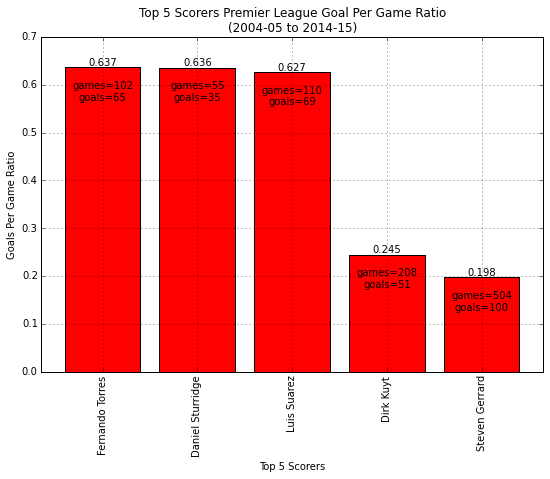

In [37]:
# plot
TITLE = 'Top 5 Scorers Premier League Goal Per Game Ratio \n(2004-05 to 2014-15)'
FIG_SIZE = (9, 6)

ax = dflfc_top['GPA'].plot(kind='bar', color='red', figsize=FIG_SIZE, width=0.8)

# annotate bars with values
for scorer_ix, (PLGames, PLGoals, GPA, APG) in enumerate(dflfc_top.values):
    x, y = scorer_ix, GPA+0.02
    annotate_str = str(GPA) + '\n\ngames={}\n'.format(str(int(PLGames))) + 'goals={}'.format(str(int(PLGoals)))
    ax.annotate(annotate_str, xy=(x,y), xytext=(x,y), va="top", ha="center", fontsize=10)

ax.set_title(TITLE)
ax.set_ylabel('Goals Per Game Ratio')
ax.set_xlabel('Top 5 Scorers')
fig = plt.gcf() # save current figure
plt.show()
fig.savefig('ScorervsGPG.png', bbox_inches='tight')

In [38]:
dflfc_apps_tot.sort('Appearances', ascending=False)

,Appearances
Player,
Steven Gerrard,504
Dirk Kuyt,208
Luis Suarez,110
Fernando Torres,102
Daniel Sturridge,55


In [39]:
dflfc_topscorers.sort('LeagueGoals', ascending=False)

,LeagueGoals
Player,
Steven Gerrard,100
Luis Suarez,69
Fernando Torres,65
Dirk Kuyt,51
Daniel Sturridge,35


Let's now examine the shots data.

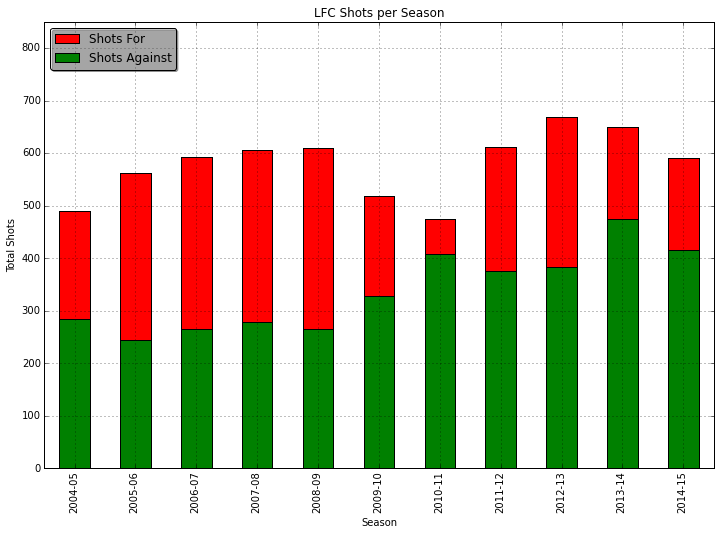

In [40]:
FIG_SIZE = (12, 8)
fig = plt.figure(figsize=FIG_SIZE)
ax = dflfc_seasons['SF'].plot(kind='bar', label='Shots For', title='LFC Shots per Season', 
                              ylim=(0, 850), color='red')
ax = dflfc_seasons['SA'].plot(kind='bar', stacked=True, color='green', label='Shots Against')
ax.set_ylabel("Total Shots")
ax.legend(loc='upper left', fancybox=True, shadow=True)
plt.show()

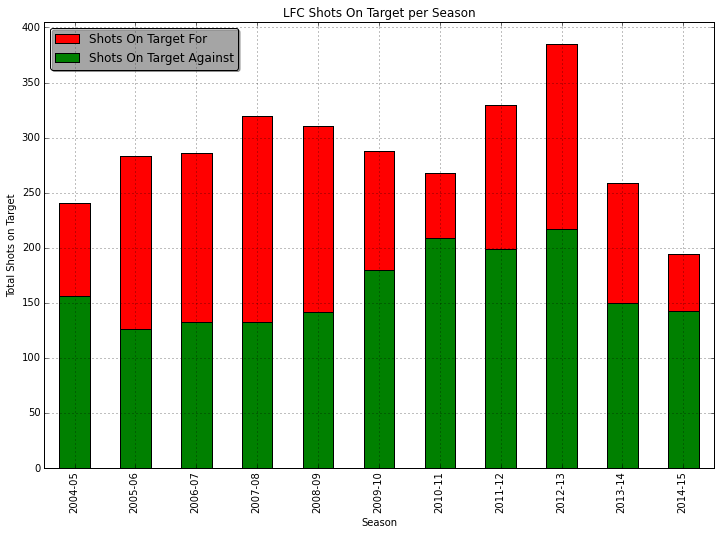

In [41]:
FIG_SIZE = (12, 8)
fig = plt.figure(figsize=FIG_SIZE)
ax = dflfc_seasons['SFT'].plot(kind='bar', label='Shots On Target For', title='LFC Shots On Target per Season', 
                               ylim=(0, dflfc_seasons['SFT'].max()+20), color='red')
ax = dflfc_seasons['SAT'].plot(kind='bar', stacked=True, color='green', label='Shots On Target Against')
ax.set_ylabel("Total Shots on Target")
ax.legend(loc='upper left', fancybox=True, shadow=True)
plt.show()

## Compare key stats (average per game)

In [42]:
dflfc_seasons_avg = pd.DataFrame()
for season, dflfc in sorted(dflfc_dict.items()):
    dflfc_summary = pd.DataFrame(dflfc.sum()).transpose()
    dflfc_summary.drop('CUMPTS', axis=1, inplace=True)

    tot_games = len(dflfc)
    initial_columns = dflfc_summary.columns.values
    for col in initial_columns:
        dflfc_summary[col+'avg'] = (dflfc_summary[col]/tot_games).round(2)

    dflfc_summary['Season'] = season
    dflfc_summary.drop(initial_columns, axis=1, inplace=True)
    dflfc_seasons_avg = pd.concat([dflfc_seasons_avg, dflfc_summary], axis=0)
dflfc_seasons_avg.set_index('Season', inplace=True)
dflfc_seasons_avg.columns.name = 'Average per game'
dflfc_seasons_avg

Average per game,GFavg,GAavg,SFavg,SAavg,SFTavg,SATavg,PTSavg
Season,,,,,,,
2004-05,1.37,1.08,12.89,7.50,6.34,4.11,1.53
2005-06,1.50,0.66,14.82,6.45,7.45,3.32,2.16
2006-07,1.50,0.71,15.58,6.97,7.53,3.50,1.79
2007-08,1.76,0.74,15.97,7.32,8.42,3.50,2.00
2008-09,2.03,0.71,16.03,7.00,8.18,3.74,2.26
2009-10,1.61,0.92,13.66,8.63,7.58,4.74,1.66
2010-11,1.55,1.16,12.50,10.76,7.05,5.50,1.53
2011-12,1.24,1.05,16.11,9.89,8.68,5.24,1.37
2012-13,1.87,1.13,17.61,10.08,10.13,5.71,1.61


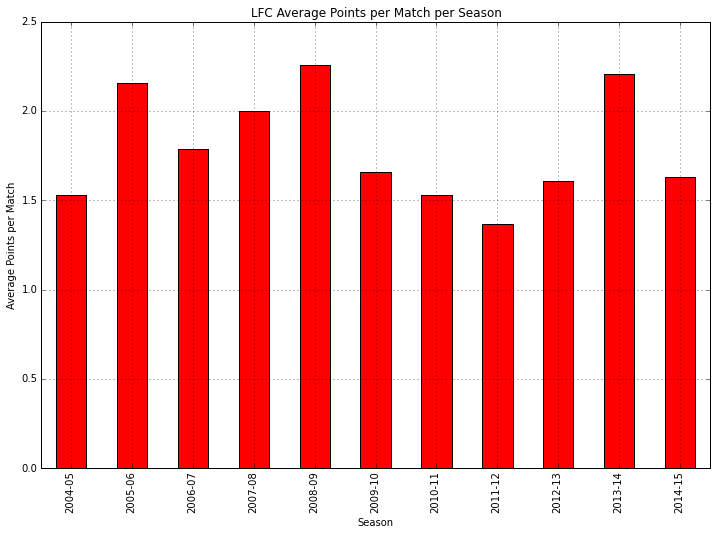

In [43]:
FIG_SIZE = (12, 8)
fig = plt.figure(figsize=FIG_SIZE)
ax = dflfc_seasons_avg['PTSavg'].plot(kind='bar', title='LFC Average Points per Match per Season', color='red')
ax.set_ylabel("Average Points per Match")
plt.show()

## Compare results (wins, draws, losses)

In [44]:
dflfc_result = pd.DataFrame() # new dataframe for results
for season, dflfc in sorted(dflfc_dict.items()):
    w = dflfc['R'][dflfc['R'] == 'W'].count()
    dflfc_result.set_value(season, 'W', w)
    
    d = dflfc['R'][dflfc['R'] == 'D'].count()
    dflfc_result.set_value(season, 'D', d)
    
    l = dflfc['R'][dflfc['R'] == 'L'].count()
    dflfc_result.set_value(season, 'L', l)
    
    total_games = len(dflfc_dict[season])
    dflfc_result.set_value(season, 'W%', 100*(w/total_games).round(3))
    dflfc_result.set_value(season, 'D%', 100*(d/total_games).round(3))
    dflfc_result.set_value(season, 'L%', 100*(l/total_games).round(3))

dflfc_result.columns.name = 'Result'
dflfc_result.index.name = 'Season'
dflfc_result

Result,W,D,L,W%,D%,L%
Season,,,,,,
2004-05,17,7,14,44.7,18.4,36.8
2005-06,25,7,6,65.8,18.4,15.8
2006-07,20,8,10,52.6,21.1,26.3
2007-08,21,13,4,55.3,34.2,10.5
2008-09,25,11,2,65.8,28.9,5.3
2009-10,18,9,11,47.4,23.7,28.9
2010-11,17,7,14,44.7,18.4,36.8
2011-12,14,10,14,36.8,26.3,36.8
2012-13,16,13,9,42.1,34.2,23.7


In [45]:
dflfc_result['W']

Season
2004-05    17
2005-06    25
2006-07    20
2007-08    21
2008-09    25
2009-10    18
2010-11    17
2011-12    14
2012-13    16
2013-14    26
2014-15    18
Name: W, dtype: float64

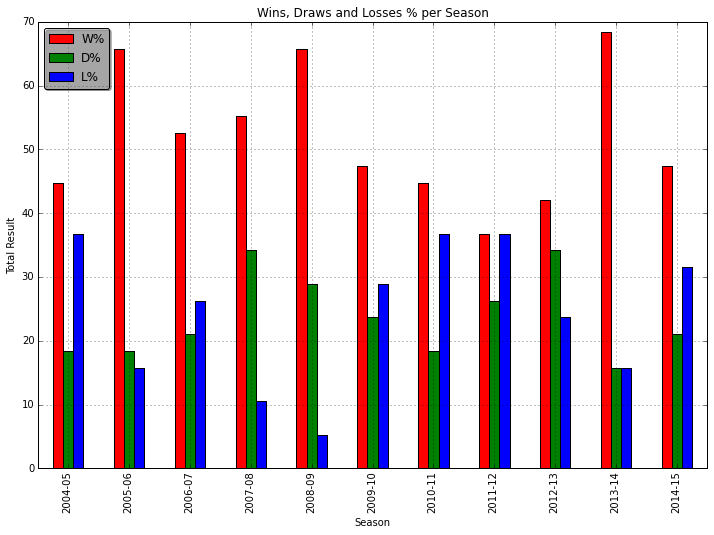

In [46]:
FIG_SIZE = (12, 8)
dflfc_result[['W%', 'D%', 'L%']].plot(kind='bar', title='Wins, Draws and Losses % per Season', 
                                   color=['red', 'green', 'blue'], figsize=FIG_SIZE)
plt.ylabel('Total Result')
plt.legend(loc='upper left', fancybox=True, shadow=True)
plt.show()

##What does the graph comparing performance look like?

Create event data structure using a dictionary with key of season and value of a tuple with match number and event description. This is used for plotting annotations.

In [47]:
def key_event(df, event_date):
    """Return match number on or after given event_date.
    
        input:  matches, pandas dataframe in munged format
                event_time, string of date in form 'mm/dd/yy'
        output: match_number, integer starting at 0 (none if no natch)
    """
    DATE_FORMAT = '%d/%m/%y'
       
    # convert event date to numpy datetime64, for comparison
    event_date = np.datetime64(datetime.strptime(event_date, DATE_FORMAT))
    
    # find match
    for match_date in df['Date'].values:
        if match_date >= event_date:
            # match found, return match number (the index)
            return int(df[df['Date'] == match_date].index.tolist()[0])
    
    # match not found
    return None

In [48]:
key_event_dict = {}
# use key_event() function to determine match at which event took place
# dates given are from wikipedia
key_event_dict['2010-11'] = (key_event(dflfc_dict['2010-11'], '08/01/11'), 
                             "Roy Hodgson's final game in season 2010-11, \nhe leaves 8/1/2011 (thank heavens)")
key_event_dict['2013-14'] = (key_event(dflfc_dict['2013-14'], '24/04/14'), 
                             "That game against Chelsea 24/04/14, \nMourinho parks the bus and gets lucky")
key_event_dict

{'2010-11': (20,
  "Roy Hodgson's final game in season 2010-11, \nhe leaves 8/1/2011 (thank heavens)"),
 '2013-14': (35,
  'That game against Chelsea 24/04/14, \nMourinho parks the bus and gets lucky')}

In [49]:
# Roy Hodgson's last game
print dflfc_dict['2010-11'].ix[20-1]

Date        2011-01-05 00:00:00
Opponent              Blackburn
HA                         Away
R                             L
GF                            1
GA                            3
SF                           13
SA                           10
SFT                           9
SAT                           4
PTS                           0
CUMPTS                       25
Name: 19, dtype: object


Create a dictionary to hold the season specific matplotlib plot options.

In [50]:
season_dict = {}
season_dict['2014-15'] = {'label': '2014-15: Brendan Rogers season 3', 'ls': '-', 'marker': '', 'lw': 2}
season_dict['2013-14'] = {'label': '2013-14: Brendan Rogers season 2', 'ls': '-', 'marker': '', 'lw': 2}
season_dict['2012-13'] = {'label': '2012-13: Brendan Rogers season 1', 'ls': '-', 'marker': '', 'lw': 2}
season_dict['2011-12'] = {'label': '2011-12: Kenny Dalglish season 2', 'ls': '-.', 'marker': 'o', 'lw': 1}
season_dict['2010-11'] = {'label': '2010-11: Roy Hodson / Kenny Dalglish season', 'ls': '-.', 'marker': '*', 'lw': 1}
season_dict['2009-10'] = {'label': '2009-10: Rafa Benitez season 6', 'ls': ':', 'marker': '', 'lw': 1}
season_dict['2008-09'] = {'label': '2008-09: Rafa Benitez season 5', 'ls': ':', 'marker': '', 'lw': 1}
season_dict['2007-08'] = {'label': '2007-08: Rafa Benitez season 4', 'ls': ':', 'marker': '', 'lw': 1}
season_dict['2006-07'] = {'label': '2006-07: Rafa Benitez season 3', 'ls': ':', 'marker': '', 'lw': 1}
season_dict['2005-06'] = {'label': '2005-06: Rafa Benitez season 2', 'ls': ':', 'marker': '', 'lw': 1}
season_dict['2004-05'] = {'label': '2004-05: Rafa Benitez season 1', 'ls': ':', 'marker': '', 'lw': 1}

In [51]:
season_dict['2004-05']['label']

'2004-05: Rafa Benitez season 1'

Plot the match vs cumlative points for all seasons, with annotations

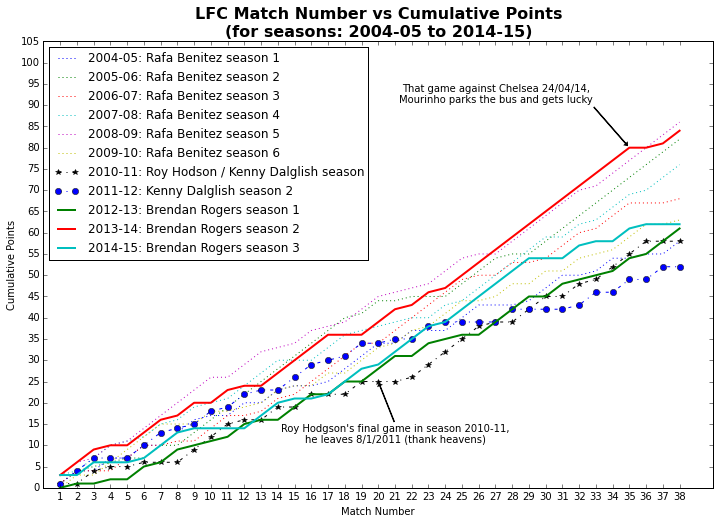

In [52]:
FIG_SIZE = (12, 8)

# calculate limits
max_played = 38
max_points = int(dflfc_seasons['PTS'].max())
seasons_analysed = ', '.join(dflfc_seasons.index.values)

# plot
fig = plt.figure(figsize=FIG_SIZE)
                    
for season, dflfc in sorted(dflfc_dict.items()):
    team_cum_points_list = dflfc['CUMPTS']
    team_match_list = range(1, len(team_cum_points_list)+1)
    # plot x vs y, with selected season options
    plt.plot(team_match_list, team_cum_points_list, **season_dict[season])

    # if there is a key event then annotate
    if season in key_event_dict:
        # get match number and event description
        event_match, event_desc = key_event_dict[season]
        
        # calculate position of annotation
        x, y = team_match_list[event_match-1], team_cum_points_list[event_match-1] 
        if y > 50:
            # set text position above point and to left
            xtext = x - 8
            ytext = y + 10
        else:
            # set text position below point and to right
            xtext = x + 1
            ytext = y - 15
            
        # annotate with arrow below event
        plt.annotate(event_desc, xy=(x,y), xytext=(xtext, ytext), va="bottom", ha="center",
                     arrowprops=dict(facecolor='black', width=.5, shrink=.05, 
                                     headwidth=4, frac=.05))

plt.xticks(range(1, max_played+1))
plt.yticks(range(0, max_points+1 + 20, 5))
plt.xlabel('Match Number')
plt.ylabel('Cumulative Points')
plt.legend(loc='upper left')
plt.title('LFC Match Number vs Cumulative Points\n(for seasons: {} to {})'.format(SEASON_LIST[0], 
                                                                                  SEASON_LIST[-1]), 
          fontsize=16, fontweight='bold')
plt.show()
fig.savefig('MatchvsPTS.png', bbox_inches='tight')

##What was the best winning run and worst losing run?

Let's find best winning run

In [53]:
for season in SEASON_LIST:
    best_run = 0
    this_run = 0
    prev_pts = 0
    for pts in dflfc_dict[season]['PTS']:
        if pts == 3:
            this_run += 1
        else:
            if this_run > best_run:
                best_run = this_run
            this_run = 0 # reset
    print 'season={}, best winning run: {} winning games'.format(season, best_run)

season=2004-05, best winning run: 3 winning games
season=2005-06, best winning run: 10 winning games
season=2006-07, best winning run: 5 winning games
season=2007-08, best winning run: 5 winning games
season=2008-09, best winning run: 5 winning games
season=2009-10, best winning run: 4 winning games
season=2010-11, best winning run: 4 winning games
season=2011-12, best winning run: 2 winning games
season=2012-13, best winning run: 3 winning games
season=2013-14, best winning run: 11 winning games
season=2014-15, best winning run: 5 winning games


Let's find worst losing run

In [54]:
for season in SEASON_LIST:
    worst_run = 0
    this_run = 0
    prev_pts = 0
    for pts in dflfc_dict[season]['PTS']:
        if pts == 0:
            this_run += 1
        else:
            if this_run > worst_run:
                worst_run = this_run
            this_run = 0 # reset
    print 'season={}, worst losing run: {} losing games'.format(season, worst_run)

season=2004-05, worst losing run: 2 losing games
season=2005-06, worst losing run: 2 losing games
season=2006-07, worst losing run: 2 losing games
season=2007-08, worst losing run: 2 losing games
season=2008-09, worst losing run: 1 losing games
season=2009-10, worst losing run: 2 losing games
season=2010-11, worst losing run: 2 losing games
season=2011-12, worst losing run: 3 losing games
season=2012-13, worst losing run: 1 losing games
season=2013-14, worst losing run: 2 losing games
season=2014-15, worst losing run: 3 losing games


## How has league position changed?

Let's produce a dataframe that shows league position for each season.

data: season | Champions | Champion Points | Champion PPG | LFC Position | LFC Points | LFC PPG

Start by creating premier league table for each season.

In [55]:
def prem_table(df, season):
    """Return premier league table dataframe for given match dataframe for given season."""
    
    results = [] # create results list

    for team in df['HomeTeam'].unique():
        home_results = df[df['HomeTeam'] == team]
        home_played = len(home_results.index)
        home_win = home_results.FTR[home_results.FTR == 'H'].count()
        home_draw = home_results.FTR[home_results.FTR == 'D'].count()
        home_lose = home_results.FTR[home_results.FTR == 'A'].count()
        home_goals_for = home_results.FTHG.sum()
        home_goals_against = home_results.FTAG.sum()

        away_results = df[df['AwayTeam'] == team]
        away_played = len(away_results.index)
        away_win = away_results.FTR[away_results.FTR == 'A'].count()
        away_draw = away_results.FTR[away_results.FTR == 'D'].count()
        away_lose = away_results.FTR[away_results.FTR == 'H'].count()
        away_goals_for = away_results.FTAG.sum()
        away_goals_against = away_results.FTHG.sum()

        result_d = {} # create dictionary to hold team results
        result_d['Team'] = team
        result_d['P'] = home_played + away_played
        result_d['W'] = home_win + away_win
        result_d['D'] = home_draw + away_draw
        result_d['L'] = home_lose + away_lose
        result_d['GF'] = home_goals_for + away_goals_for
        result_d['GA'] = home_goals_against + away_goals_against
        result_d['GD'] = result_d['GF'] - result_d['GA']
        result_d['PTS'] = result_d['W']*3 + result_d['D']

        results.append(result_d) # append team result dictionary to list of results

    # create DataFrame from results and sort by points (and then goal difference)
    PLtable = pd.DataFrame(results, columns=['Team', 'P', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'PTS'])
    PLtable.sort(columns=['PTS', 'GD'], ascending=False, inplace=True)
    PLtable['Position'] = range(1, len(PLtable)+1) # add new column for position, with highest points first
    PLtable.set_index(['Position'], inplace=True, drop=True) 
    return PLtable

In [56]:
# create new dataframe for positions
col_names = ['Champions', 'ChampPoints', 'ChampPPG', 'LFCPos', 'LFCPoints', 'LFCPPG']
df_position = pd.DataFrame(columns=col_names)

for season, df in sorted(df_dict.items()):
    PLTdf = prem_table(df, season)
    champions, champ_pts, champ_games = PLTdf[['Team', 'PTS', 'P']].iloc[0]
    champ_ppg = round(champ_pts/champ_games, 2)
    lfc_pos = PLTdf[PLTdf['Team'] == 'Liverpool'].index[0]
    lfc_pts = PLTdf['PTS'][PLTdf['Team'] == 'Liverpool'].values[0]
    lfc_games =  PLTdf['P'][PLTdf['Team'] == 'Liverpool'].values[0]
    lfc_ppg = round(lfc_pts/lfc_games, 2)
    df_position.loc[season] = [champions, champ_pts, champ_ppg, lfc_pos, lfc_pts, lfc_ppg]

df_position.index.name = 'Season'
df_position

,Champions,ChampPoints,ChampPPG,LFCPos,LFCPoints,LFCPPG
Season,,,,,,
2004-05,Chelsea,95,2.50,5,58,1.53
2005-06,Chelsea,91,2.39,3,82,2.16
2006-07,Man United,89,2.34,3,68,1.79
2007-08,Man United,87,2.29,4,76,2.00
2008-09,Man United,90,2.37,2,86,2.26
2009-10,Chelsea,86,2.26,7,63,1.66
2010-11,Man United,80,2.11,6,58,1.53
2011-12,Man City,89,2.34,8,52,1.37
2012-13,Man United,89,2.34,7,61,1.61


Plot position performance.

In [57]:
# Ref: http://stackoverflow.com/questions/739241/date-ordinal-output
def n_plus_suffix(n):
    """Return n plus the suffix e.g. 1 becomes 1st, 2 becomes 2nd."""
    assert isinstance(n, (int, long)), '{} is not an integer'.format(n)
    
    if 10 <= n % 100 < 20:
        return str(n) + 'th'
    else:
       return  str(n) + {1 : 'st', 2 : 'nd', 3 : 'rd'}.get(n % 10, "th")

In [58]:
# test
for i in range(1, 32):
    print n_plus_suffix(i), 

1st 2nd 3rd 4th 5th 6th 7th 8th 9th 10th 11th 12th 13th 14th 15th 16th 17th 18th 19th 20th 21st 22nd 23rd 24th 25th 26th 27th 28th 29th 30th 31st


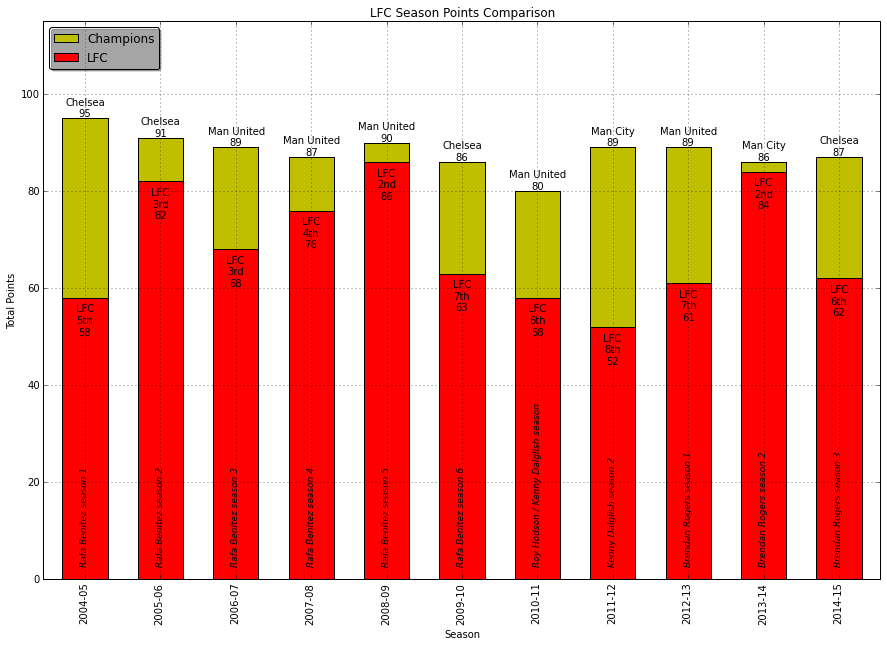

In [59]:
TITLE = 'LFC Season Points Comparison'
FIG_SIZE = (15, 10)
max_points = int(df_position['ChampPoints'].max())
fig = plt.figure(figsize=FIG_SIZE)

ax = df_position['ChampPoints'].plot(kind='bar', color='y', label='Champions', width=0.6)
ax = df_position['LFCPoints'].plot(kind='bar', color='red', label='LFC', width=0.6)

for sidx, (ch, chpts, chppg, lfcpos, lfcpts, lfcppg) in enumerate(df_position.values):
    # annotate description of each season, rotated    
    season = SEASON_LIST[sidx]
    season_desc = season_dict[season]['label'][len(season)+1:]
    x, y = (sidx, 2) # calculate position of annotation
    ax.annotate(season_desc, xy=(x,y), xytext=(x,y), va="bottom", ha="center", 
                rotation='vertical', style='italic', fontsize='9')
    # annotate above champions bar the name of champions and winning points total
    x, y = (sidx, chpts)
    ax.annotate(str(ch)+'\n'+str(int(chpts)), xy=(x,y), xytext=(x,y), 
                va="bottom", ha="center")
    # annotate below LFC bar the points total and position
    x, y = (sidx, lfcpts - 8)
    ax.annotate('LFC\n' + str(n_plus_suffix(int(lfcpos))) + '\n' + str(int(lfcpts)), 
                xy=(x,y), xytext=(x,y), va="bottom", ha="center")

ax.set_ylabel("Total Points")
ax.set_ylim((0, max_points+20))
ax.set_title(TITLE)
plt.legend(loc='upper left', fancybox=True, shadow=True)
plt.show()
fig.savefig('SeasonvsPTS.png', bbox_inches='tight')

In [60]:
print 'Champions max points per game: {}'.format(df_position['ChampPPG'].max())

Champions max points per game: 2.5


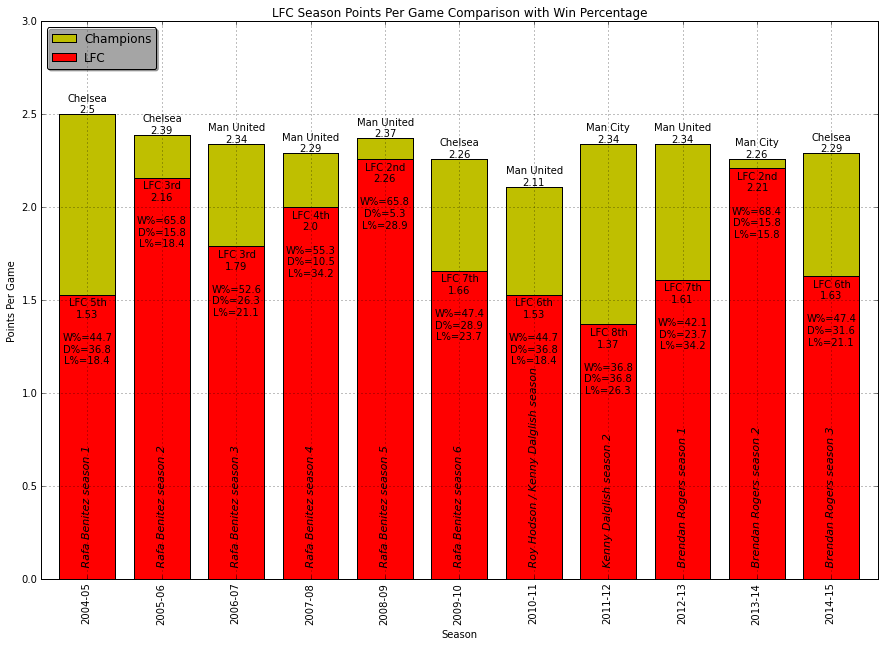

In [61]:
TITLE = 'LFC Season Points Per Game Comparison with Win Percentage'
FIG_SIZE = (15, 10)
max_ppg = df_position['ChampPPG'].max()
fig = plt.figure(figsize=FIG_SIZE)

ax = df_position['ChampPPG'].plot(kind='bar', color='y', label='Champions', width=0.75)
ax = df_position['LFCPPG'].plot(kind='bar', color='red', label='LFC', width=0.75)
ax.set_ylabel("Points Per Game")

season_lfcppg = [] #  to hold tuple of (season, LFC points per game)

for sidx, (ch, chpts, chppg, lfcpos, lfcpts, lfcppg) in enumerate(df_position.values):
    # annotate description of each season, rotated
    season = SEASON_LIST[sidx]
    season_desc = season_dict[season]['label'][len(season)+1:]
    x, y = (sidx, .05) # calculate position of annotation
    ax.annotate(season_desc, xy=(x,y), xytext=(x,y), va="bottom", ha="center", 
                rotation='vertical', style='italic', fontsize='11')
    # annotate above champions bar the name of champions and points per game
    x, y = (sidx, chppg)
    ax.annotate(str(ch)+'\n'+ str(chppg), xy=(x,y), xytext=(x,y), 
                va="bottom", ha="center")
    # annotate below LFC bar the points total and position
    x, y = (sidx, lfcppg - 0.38)
    w, d, l = dflfc_result[['W%', 'D%', 'L%']].ix[sidx].values
    lfc_pos_str = str(n_plus_suffix(int(lfcpos)))
    lfc_ppg_str = '\n' + str(lfcppg)
    result_str = '\n\nW%={}\nD%={}\nL%={}'.format(w,l,d)
    ax.annotate('LFC ' + str(n_plus_suffix(int(lfcpos))) + lfc_ppg_str + result_str, xy=(x,y), xytext=(x,y), 
                va="bottom", ha="center")
    
    # append ppg to list 
    season_lfcppg.append((season, lfcppg))
    
ax.set_ylim((0, max_ppg+0.5))
ax.set_title(TITLE)
plt.legend(loc='upper left', fancybox=True, shadow=True)
plt.show()
fig.savefig('SeasonvsPPG.png', bbox_inches='tight')

RH: matches=20, points=25, ppg=1.25, fcast_pts=47
KD: matches=18, points=33, ppg=1.83, fcast_pts=69


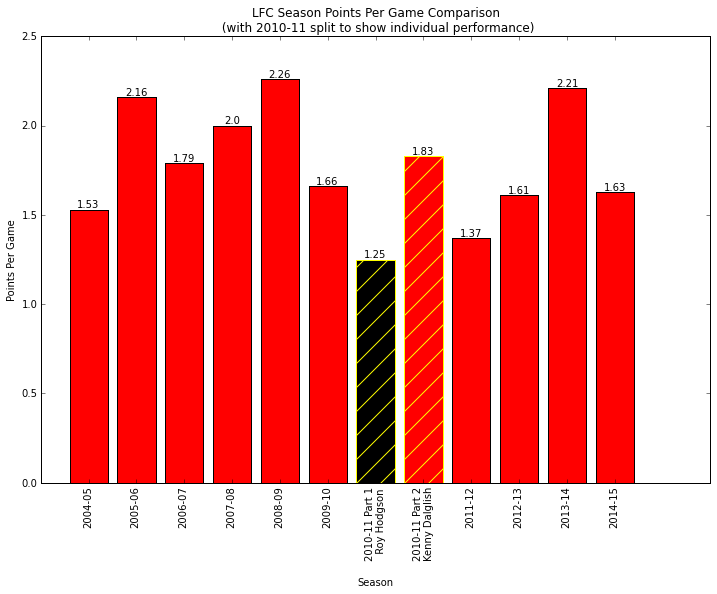

In [62]:
DARKEST_SEASON = '2010-11'
DARK_GAMES = 19 # number of games that Hodgson was in charge
TOTAL_GAMES = 38
rh_season_desc = DARKEST_SEASON + ' Part 1\n  Roy Hodgson'
kd_season_desc = DARKEST_SEASON + ' Part 2\nKenny Dalglish'

# calculate points per game for Roy Hodgson
dflfc_201011_rh = dflfc_dict[DARKEST_SEASON][0:DARK_GAMES+1] 
rh_matches = len(dflfc_201011_rh)
rh_points = dflfc_201011_rh['CUMPTS'].values[-1]
rh_ppg = round(rh_points/rh_matches, 2)
rh_fcast_pts = int(rh_points*(TOTAL_GAMES/rh_matches))
print 'RH: matches={}, points={}, ppg={}, fcast_pts={}'.format(rh_matches, rh_points, rh_ppg, rh_fcast_pts)

# calculate points per game for Kenny Dalglish
dflfc_201011_kd = dflfc_dict[DARKEST_SEASON][DARK_GAMES+1:] 
kd_matches = len(dflfc_201011_kd)
kd_points = dflfc_201011_kd['CUMPTS'].values[-1] - rh_points
kd_ppg = round(kd_points/kd_matches, 2)
kd_fcast_pts = int(kd_points*(TOTAL_GAMES/kd_matches))
print 'KD: matches={}, points={}, ppg={}, fcast_pts={}'.format(kd_matches, kd_points, kd_ppg, kd_fcast_pts)

# replace DARKEST SEASON list with 2 ppg entries
# one for Hodgson and one for Dalglish
season_lfcppg_new = season_lfcppg[:] # copy
ppg_201011 = [lfcppg for (season, lfcppg) in season_lfcppg_new if season == DARKEST_SEASON][0]
season_lfcppg_new.remove((DARKEST_SEASON, ppg_201011))
season_lfcppg_new.append((rh_season_desc, rh_ppg)) 
season_lfcppg_new.append((kd_season_desc, kd_ppg))

# plot ppg as bar chart
TITLE = 'LFC Season Points Per Game Comparison\n \
(with 2010-11 split to show individual performance)'
FIG_SIZE = (12, 8)
fig = plt.figure(figsize=FIG_SIZE)
season_lfcppg_new.sort() # sort by season, in place
season_labels = [s for (s, p) in season_lfcppg_new]
x = range(1, len(season_lfcppg_new)+1)
y = [p for (s, p) in season_lfcppg_new]
ax = plt.bar(x, y, align='center', color='r')

# plot ppg as text above bar
for xidx, yt in enumerate(y):
    xt = xidx + 1
    plt.annotate(str(yt), xy=(xt,yt), xytext=(xt, yt), va="bottom", ha="center")   

# highlight the low bar with yellow border in black
# this is Hodgson's first half of 2010-11
season_low, ppg_low = sorted(season_lfcppg_new, key=lambda tup: tup[1], reverse=False)[0]
xlow = season_lfcppg_new.index((season_low, ppg_low))
ax[xlow].set_color('black')
ax[xlow].set_edgecolor('yellow')
ax[xlow].set_hatch('/')

# and highlight second half of this season with yellow border
# this is Dalglish's second half of 2010-11
ax[xlow+1].set_edgecolor('yellow')
ax[xlow+1].set_hatch('/')

# add labels and plot
plt.xticks(x, season_labels, rotation='vertical')
plt.ylabel("Points Per Game")
plt.xlabel("\nSeason")
plt.title(TITLE)
plt.show()
fig.savefig('SeasonvsPTSdark.png', bbox_inches='tight')

In [63]:
dflfc_201011_rh.tail()

,Date,Opponent,HA,R,GF,GA,SF,SA,SFT,SAT,PTS,CUMPTS
15,2010-12-06,Aston Villa,Home,W,3,0,12,5,7,2,3,22
16,2010-12-11,Newcastle,Away,L,1,3,16,8,7,5,0,22
17,2010-12-29,Wolves,Home,L,0,1,9,7,5,3,0,22
18,2011-01-01,Bolton,Home,W,2,1,16,10,7,4,3,25
19,2011-01-05,Blackburn,Away,L,1,3,13,10,9,4,0,25


Blackburn was his final game - what joy

## Who are the richest English clubs?

In [64]:
rich_list_2015.head()

,Rank,Team,Country,Value($M),Revenue($M)
0,1,Real Madrid,Spain,3260,746
1,2,FC Barcelona,Spain,3160,657
2,3,Man United,England,3100,703
3,4,Bayern Munich,Germany,2350,661
4,5,Man City,England,1380,562


In [65]:
eng_rich_list = rich_list_2015[['Rank', 'Team', 'Value($M)', 'Revenue($M)'] ][rich_list_2015['Country'] == 'England']
eng_rich_list.reset_index(inplace=True, drop=True)
eng_rich_list

,Rank,Team,Value($M),Revenue($M)
0,3,Man United,3100,703
1,5,Man City,1380,562
2,6,Chelsea,1370,526
3,7,Arsenal,1310,487
4,8,Liverpool,982,415
5,13,Tottenham,600,293
6,18,Newcastle,349,210
7,19,West Ham,309,186


In [66]:
eng_rich_list

,Rank,Team,Value($M),Revenue($M)
0,3,Man United,3100,703
1,5,Man City,1380,562
2,6,Chelsea,1370,526
3,7,Arsenal,1310,487
4,8,Liverpool,982,415
5,13,Tottenham,600,293
6,18,Newcastle,349,210
7,19,West Ham,309,186


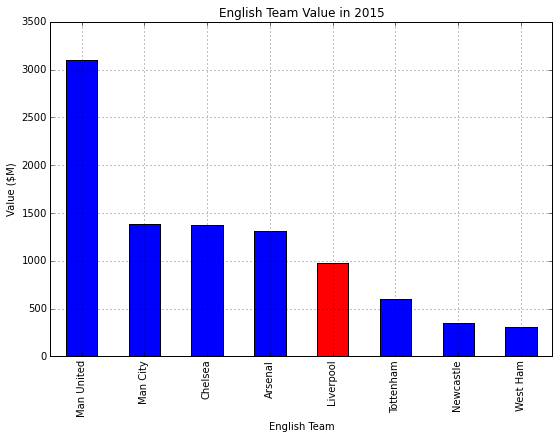

In [67]:
FIG_SIZE = (9, 6)
fig = plt.figure(figsize=FIG_SIZE)

# create list of colours corresponding to teams
# set LFC to red
bar_colours = ['b' for _ in range(len(eng_rich_list))]
LFC_idx = int(eng_rich_list[eng_rich_list['Team'] == 'Liverpool'].index.tolist()[0])
bar_colours[LFC_idx] = 'r'

ax = eng_rich_list.plot(x='Team', y='Value($M)', kind='bar', legend=False, 
                        figsize=FIG_SIZE, color=bar_colours, title='English Team Value in 2015')
ax.set_xlabel('English Team')
ax.set_ylabel('Value ($M)')
plt.show()
fig.savefig('TeamvsValue.png', bbox_inches='tight')

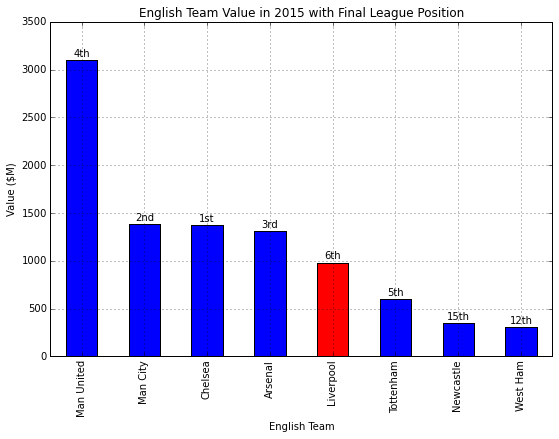

In [68]:
TITLE = 'English Team Value in 2015 with Final League Position'
FIG_SIZE = (9, 6)
fig = plt.figure(figsize=FIG_SIZE)

# create list of colours corresponding to teams
# set LFC to red
bar_colours = ['b' for _ in range(len(eng_rich_list))]
LFC_idx = int(eng_rich_list[eng_rich_list['Team'] == 'Liverpool'].index.tolist()[0])
bar_colours[LFC_idx] = 'r'

# create list of rich teams
rich_teams = list(eng_rich_list['Team'].values)

# plot the rich teams
ax = eng_rich_list.plot(x='Team', y='Value($M)', kind='bar', legend=False, 
                        figsize=FIG_SIZE, color=bar_colours)

# create new dataframe for positions
col_names = ['Champions', 'ChampPoints', 'ChampPPG', 'LFCPos', 'LFCPoints', 'LFCPPG']
df_position = pd.DataFrame(columns=col_names)

df_PLT2015 = prem_table(df_dict['2014-15'], '2014-15')['Team']

# plot the positions
for pos, team in df_PLT2015.iteritems():
    if team in rich_teams:  
        # annotate team's final position
        team_idx = rich_teams.index(team)
        team_value = eng_rich_list['Value($M)'][eng_rich_list['Team'] == team].values[0]
        x, y = (team_idx, team_value + 20)
        ax.annotate(str(n_plus_suffix(int(pos))), xy=(x,y), xytext=(x,y), 
                    va="bottom", ha="center")
    
ax.set_xlabel('English Team')
ax.set_ylabel('Value ($M)')
ax.set_title(TITLE)
fig = plt.gcf() # save current figure
plt.show()
fig.savefig('TeamvsValue.png', bbox_inches='tight')

## What are the title winning top scorer partnerships?

Let's analyse the champion hotshot data.

In [69]:
dflfc_champ_hotshots.tail()

,Season,Player,LeagueGoals,Manager
31,1985-86,Jan Molby,14,Kenny Dalglish
32,1987-88,John Aldridge,26,Kenny Dalglish
33,1987-88,Peter Beardsley / John Barnes,15,Kenny Dalglish
34,1989-90,John Barnes,22,Kenny Dalglish
35,1989-90,Ian Rush,18,Kenny Dalglish


### What is the highest scoring partnership?

In [70]:
s_partner_goals = dflfc_champ_hotshots['LeagueGoals'].groupby(dflfc_champ_hotshots['Season']).sum()
df_partner_goals = pd.DataFrame(data=s_partner_goals)
df_partner_goals.sort('LeagueGoals', ascending=False).head(1)

,LeagueGoals
Season,
1963-64,52


In [71]:
dflfc_champ_hotshots[dflfc_champ_hotshots['Season'] == '1963-64']

,Season,Player,LeagueGoals,Manager
10,1963-64,Roger Hunt,31,Bill Shankly
11,1963-64,Ian St John,21,Bill Shankly


### What is the lowest scoring partnership?

In [72]:
df_partner_goals.sort('LeagueGoals', ascending=False).tail(1)

,LeagueGoals
Season,
1976-77,22


In [73]:
dflfc_champ_hotshots[dflfc_champ_hotshots['Season'] == '1976-77']

,Season,Player,LeagueGoals,Manager
18,1976-77,Kevin Keegan,12,Bob Paisley
19,1976-77,John Toshack,10,Bob Paisley


### What is the average total goals of title winning partnership? And what is highest and lowest?

In [74]:
print 'average partnership goals: {}'.format(df_partner_goals['LeagueGoals'].mean())
print 'max partnership goals: {}'.format(df_partner_goals['LeagueGoals'].max())
print 'min partnership goals: {}'.format(df_partner_goals['LeagueGoals'].min())

average partnership goals: 36.5
max partnership goals: 52
min partnership goals: 22


### What is the average total goals of title winning top striker?

In [75]:
df_scorer_first = dflfc_champ_hotshots.groupby('Season').first()
print 'top scorer average: {}'.format(df_scorer_first['LeagueGoals'].mean().round(2))

top scorer average: 21.78


### What is the average total goals of title winning partner?

In [76]:
df_scorer_second = dflfc_champ_hotshots.groupby('Season').last()
print 'partner scorer average: {}'.format(df_scorer_second['LeagueGoals'].mean().round(2))

partner scorer average: 14.72


### Which top striker scored most goals?

In [77]:
df_scorer_first.sort('LeagueGoals', ascending=False).head(1)

,Player,LeagueGoals,Manager
Season,,,
1983-84,Ian Rush,32,Joe Fagan


### Which top striker scored least goals?

In [78]:
df_scorer_first.sort('LeagueGoals', ascending=False).tail(1)

,Player,LeagueGoals,Manager
Season,,,
1976-77,Kevin Keegan,12,Bob Paisley


### Which partner striker scored most goals?

In [79]:
df_scorer_second.sort('LeagueGoals', ascending=False).head(1)

,Player,LeagueGoals,Manager
Season,,,
1946-47,Jack Balmer,24,George Kay


That's high, let's look at the partnership.

In [80]:
dflfc_champ_hotshots[dflfc_champ_hotshots['Season'] == '1946-47']

,Season,Player,LeagueGoals,Manager
8,1946-47,Albert Stubbins,24,George Kay
9,1946-47,Jack Balmer,24,George Kay


### Which partner striker scored least goals?

In [81]:
df_scorer_second.sort('LeagueGoals', ascending=False).tail(1)

,Player,LeagueGoals,Manager
Season,,,
1983-84,Kenny Dalglish / Graeme Souness,7,Joe Fagan


### Who were hotshots in 70s and 80s?

In [82]:
dflfc_champ_hotshots[(dflfc_champ_hotshots['Season'].str.contains('197')) |
                    (dflfc_champ_hotshots['Season'].str.contains('198'))]

,Season,Player,LeagueGoals,Manager
14,1972-73,John Toshack,13,Bill Shankly
15,1972-73,Kevin Keegan,13,Bill Shankly
16,1975-76,John Toshack,16,Bob Paisley
17,1975-76,Kevin Keegan,12,Bob Paisley
18,1976-77,Kevin Keegan,12,Bob Paisley
19,1976-77,John Toshack,10,Bob Paisley
20,1978-79,Kenny Dalglish,21,Bob Paisley
21,1978-79,David Johnson,16,Bob Paisley
22,1979-80,David Johnson,21,Bob Paisley
23,1979-80,Kenny Dalglish,16,Bob Paisley


legends one and all